# Stripe: Analysis of High Growth Merchant Trends

The merchants in the sample data can be segmented in terms of recency, longevity, frequency and monetary value of transactions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

transactions = pd.read_csv("stripe.csv") # load sample data

In [2]:
transactions.head() # check data format and column headings

,user,time,amount_in_cents
0,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-19T23:39:56.925Z,1203
1,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-19T23:41:47.026Z,1203
2,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-23T15:19:54.836Z,2405
3,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-23T15:21:08.273Z,2405
4,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-24T15:19:39.386Z,1203


In [3]:
transactions.isnull().sum(axis=0) # check for missing values

user               0
time               0
amount_in_cents    0
dtype: int64

Calculate transaction frequency and monetary values

In [4]:
segments = transactions.groupby('user').agg({'time': 'count', 'amount_in_cents': 'mean'}).rename(columns={'time':'frequency','amount_in_cents':'monetary_value'})
segments.head()

,frequency,monetary_value
user,,
00038f0484334ac047449166cfbbf6452b31c85c,310,3159.106452
0012a74e2bb1ab0073b2e18532e87474b6b7cfca,2,4570.000000
001855810c25d8bb03210f8c0114de27da9cd76c,195,7725.482051
001f3978fa7cad62f2e2ddfa155184a316282b0e,166,16683.036145
00317873b9dcbcff6759f7ec4225d8531520fdcb,2,4029.000000


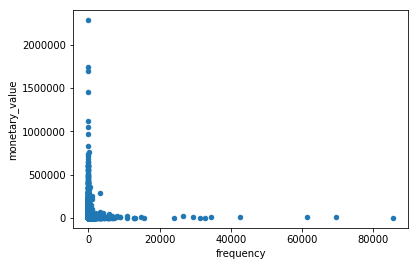

In [5]:
segments.plot(0,1,kind='scatter') # plot transaction frequency against average monetary value

We can zoom in on the bottom left quandarant to look at merchants with lower frequency and lower monetary value

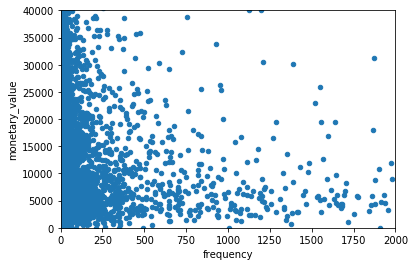

In [6]:
segments.plot(0,1,kind='scatter',xlim=[0,2000],ylim=[0,40000])

This suggests that we have three kinds of merchant:
    low frequency of low value transactions,
    high frequency of low value transactions or
    low frequency of high value tranactions.
    
We have no merchants that are both higher frequency and higher value and the majority of merchants are in the bottom left quadrant; lower frequency with lower value

The next part of the segmentation takes into account the date of each transaction and recency of last transaction.

In [7]:
# Check date range and data formats

first_transaction_time = transactions['time'].min()
print(first_transaction_time)
STARTTIME = datetime.datetime.strptime(first_transaction_time,'%Y-%m-%dT%H:%M:%S.%f%z')
print (STARTTIME)

last_transaction_time = transactions['time'].max()
print(last_transaction_time)
ENDTIME = datetime.datetime.strptime(last_transaction_time,'%Y-%m-%dT%H:%M:%S.%f%z')
print (ENDTIME)

2015-11-06T02:33:18.946Z
2015-11-06 02:33:18.946000+00:00
2017-11-04T23:19:27.1Z
2017-11-04 23:19:27.100000+00:00


In [8]:
# Convert time string into datetime allowing for the possibility of optional millseconds
def parse_time (t) :
    try:
        return datetime.datetime.strptime(t,'%Y-%m-%dT%H:%M:%S.%f%z')
    except ValueError:
        return datetime.datetime.strptime(t,'%Y-%m-%dT%H:%M:%S%z')
    
transactions['datetime'] = transactions['time'].map(parse_time)
transactions.head()

,user,time,amount_in_cents,datetime
0,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-19T23:39:56.925Z,1203,2016-02-19 23:39:56.925000+00:00
1,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-19T23:41:47.026Z,1203,2016-02-19 23:41:47.026000+00:00
2,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-23T15:19:54.836Z,2405,2016-02-23 15:19:54.836000+00:00
3,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-23T15:21:08.273Z,2405,2016-02-23 15:21:08.273000+00:00
4,00038f0484334ac047449166cfbbf6452b31c85c,2016-02-24T15:19:39.386Z,1203,2016-02-24 15:19:39.386000+00:00


In [14]:
time_segments = transactions.groupby('user').agg({'datetime': ['first','last','count'], 'amount_in_cents': ['mean']})
time_segments.head()

datetime  \
                                                                    first   
user                                                                        
00038f0484334ac047449166cfbbf6452b31c85c 2016-02-19 23:39:56.925000+00:00   
0012a74e2bb1ab0073b2e18532e87474b6b7cfca 2016-11-04 14:50:09.257000+00:00   
001855810c25d8bb03210f8c0114de27da9cd76c 2016-06-11 15:20:47.121000+00:00   
001f3978fa7cad62f2e2ddfa155184a316282b0e 2015-11-15 19:57:58.304000+00:00   
00317873b9dcbcff6759f7ec4225d8531520fdcb 2016-02-11 14:09:14.527000+00:00   

                                                                           \
                                                                     last   
user                                                                        
00038f0484334ac047449166cfbbf6452b31c85c 2016-05-08 14:38:37.264000+00:00   
0012a74e2bb1ab0073b2e18532e87474b6b7cfca 2016-11-10 00:19:25.407000+00:00   
001855810c25d8bb03210f8c0114de27da9cd76c 2017-06-04 19:24:12.293000+00:00   
001f3978fa7cad62f2e2ddfa155184a316282b0e 2016-11-07 18:17:18.690000+00:00   
00317873b9dcbcff6759f7ec4225d8531520fdcb 2016-02-13 17:00:29.935000+00:00   

                                               amount_in_cents  
                                         count            mean  
user                                                            
00038f0484334ac047449166cfbbf6452b31c85c   310     3159.106452  
0012a74e2bb1ab0073b2e18532e87474b6b7cfca     2     4570.000000  
001855810c25d8bb03210f8c0114de27da9cd76c   195     7725.482051  
001f3978fa7cad62f2e2ddfa155184a316282b0e   166    16683.036145  
00317873b9dcbcff6759f7ec4225d8531520fdcb     2     4029.000000

In [25]:
time_segments['recency'] = time_segments['datetime']['last'].map (lambda t : (ENDTIME - t).days)
time_segments['seniority'] = time_segments['datetime']['first'].map (lambda t : (ENDTIME - t).days)
time_segments['longevity'] = time_segments['seniority'] - time_segments['recency']
time_segments.head()

datetime  \
                                                                    first   
user                                                                        
00038f0484334ac047449166cfbbf6452b31c85c 2016-02-19 23:39:56.925000+00:00   
0012a74e2bb1ab0073b2e18532e87474b6b7cfca 2016-11-04 14:50:09.257000+00:00   
001855810c25d8bb03210f8c0114de27da9cd76c 2016-06-11 15:20:47.121000+00:00   
001f3978fa7cad62f2e2ddfa155184a316282b0e 2015-11-15 19:57:58.304000+00:00   
00317873b9dcbcff6759f7ec4225d8531520fdcb 2016-02-11 14:09:14.527000+00:00   

                                                                           \
                                                                     last   
user                                                                        
00038f0484334ac047449166cfbbf6452b31c85c 2016-05-08 14:38:37.264000+00:00   
0012a74e2bb1ab0073b2e18532e87474b6b7cfca 2016-11-10 00:19:25.407000+00:00   
001855810c25d8bb03210f8c0114de27da9cd76c 2017-06-04 19:24:12.293000+00:00   
001f3978fa7cad62f2e2ddfa155184a316282b0e 2016-11-07 18:17:18.690000+00:00   
00317873b9dcbcff6759f7ec4225d8531520fdcb 2016-02-13 17:00:29.935000+00:00   

                                               amount_in_cents recency  \
                                         count            mean           
user                                                                     
00038f0484334ac047449166cfbbf6452b31c85c   310     3159.106452     545   
0012a74e2bb1ab0073b2e18532e87474b6b7cfca     2     4570.000000     359   
001855810c25d8bb03210f8c0114de27da9cd76c   195     7725.482051     153   
001f3978fa7cad62f2e2ddfa155184a316282b0e   166    16683.036145     362   
00317873b9dcbcff6759f7ec4225d8531520fdcb     2     4029.000000     630   

                                         seniority longevity  
                                                              
user                                                          
00038f0484334ac047449166cfbbf6452b31c85c       623        78  
0012a74e2bb1ab0073b2e18532e87474b6b7cfca       365         6  
001855810c25d8bb03210f8c0114de27da9cd76c       511       358  
001f3978fa7cad62f2e2ddfa155184a316282b0e       720       358  
00317873b9dcbcff6759f7ec4225d8531520fdcb       632         2

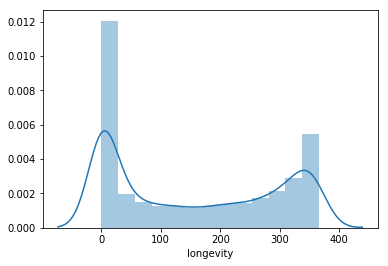

In [26]:
sns.distplot(time_segments['longevity']) # look for longevity patterns

The longevity pattern suggests two clusters of user, those who have been with Stripe for a long time and those who are either very recent or very short-lived.

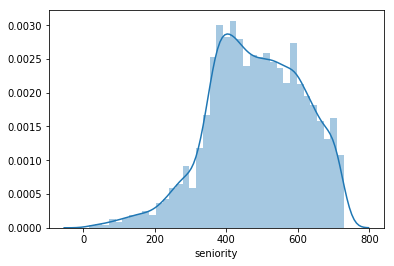

In [27]:
sns.distplot(time_segments['seniority']) # look for loyalty patterns

This suggests that most users joined Stripe within the previous year

Plot recency against frequency, and recency aginst monetary value

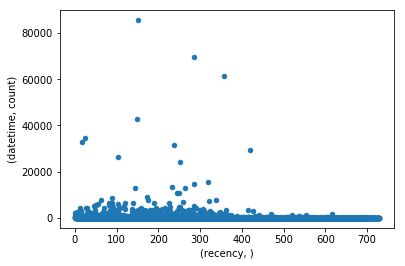

In [21]:
time_segments.plot(4,2,kind='scatter') # recency against frequency

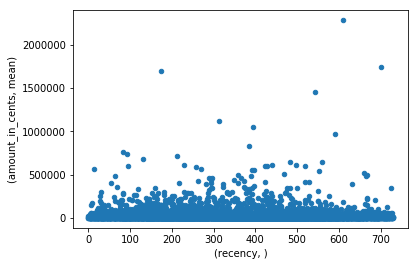

In [22]:
time_segments.plot(4,3,kind='scatter') # recency against monetary

This indicates that recency is indepdendant of frequency or monetary value

# Identification and Prediction of High Growth Merchants

We will define high growth in terms of growth in transaction frequency.

Since we have two years of transaction date we would split the data into to one year of historical data and one year of future data. We might define a high growth merchant as a user for whom the second year shows a significant increase in transaction frequency.

In [24]:
# Add columns for time buckets
transactions['year'] = transactions.datetime.map (lambda t: int((t-STARTTIME).days / 365))
transactions['quarter'] = transactions.datetime.map (lambda t: int((t-STARTTIME).days / 91))
transactions['month'] = transactions.datetime.map (lambda t: int((t-STARTTIME).days / 30))
transactions['week'] = transactions.datetime.map (lambda t: int((t-STARTTIME).days / 7))
transactions['day'] = transactions.datetime.map (lambda t: (t-STARTTIME).days)

transactions.tail()

,user,time,amount_in_cents,datetime,year,quarter,month,week,day
1524705,ffe986bb5a18d164ed9b1cc4e1c07016d396a2c2,2016-08-04T05:19:27.029Z,72998,2016-08-04 05:19:27.029000+00:00,0,2,9,38,272
1524706,ffe986bb5a18d164ed9b1cc4e1c07016d396a2c2,2016-08-07T18:23:10.951Z,2525,2016-08-07 18:23:10.951000+00:00,0,3,9,39,275
1524707,ffe986bb5a18d164ed9b1cc4e1c07016d396a2c2,2016-10-13T15:59:23.566Z,4450,2016-10-13 15:59:23.566000+00:00,0,3,11,48,342
1524708,ffe986bb5a18d164ed9b1cc4e1c07016d396a2c2,2016-12-20T17:40:41.99Z,29223,2016-12-20 17:40:41.990000+00:00,1,4,13,58,410
1524709,ffe986bb5a18d164ed9b1cc4e1c07016d396a2c2,2017-05-11T01:24:03.075Z,10944,2017-05-11 01:24:03.075000+00:00,1,6,18,78,551


In [166]:
yearly_frequency = transactions.groupby(['user','year']).agg({'datetime':'count'}).rename(columns={'datetime':'frequency'})
yearly_frequency.head(10)

frequency
user                                     year           
00038f0484334ac047449166cfbbf6452b31c85c 0           310
0012a74e2bb1ab0073b2e18532e87474b6b7cfca 0             1
                                         1             1
001855810c25d8bb03210f8c0114de27da9cd76c 0             2
                                         1           193
001f3978fa7cad62f2e2ddfa155184a316282b0e 0           165
                                         1             1
00317873b9dcbcff6759f7ec4225d8531520fdcb 0             2
0035123c62bda17867893802719d030620e4d75e 1             2
004aee0cd377dac9e322f42c12cb68876a47aaa5 0             1

In [167]:
# Calculate percentage increase year-on-year; ignore the value for year 0
growth_table = yearly_frequency.groupby('user').agg({'frequency':'pct_change'}).rename(columns={'frequency':'growth'})
growth_table = growth_table.query('year > 0')
growth_table.sort_values(by='growth',ascending=False).head(10)

,,growth
user,year,
78f2d8ae289cdddb9636600247c621253587eab9,1,2481.00
efbc49f1741354269913ae8974164fcb66b1d1f2,1,1702.00
98058449c2989069c339fadc11e73e06d673fce7,1,1369.25
c4a83dc39c62c905db9d1148cc9162ea5431f071,1,1204.00
1f9728eedff7af82c9dff4c993b72350ca13878b,1,841.40
572ab8518e567000d3156f412d5740f030376555,1,827.00
cad034c0805d1802bcb71247a15054c36a3e3ba3,1,761.00
b813d54a0e9ce7deb0fbf99d677af9dbc48ede17,1,705.00
5e01900c3df57459256435a5795281c1eb2491af,1,667.00


The first challenge is to see if high growth merchants can be predicted solely from the segmentation.

This growth table tells us who the high growth merchants are. Now, suppose that we only have the past 12 months historical data to work with.

In [168]:
historical_transactions = transactions.query ('year==0')
historical_transactions.sort_values(by="time",ascending=False).head()

,user,time,amount_in_cents,datetime,year,quarter,month,week,day
194825,2a107ca814dc66955200dc823e65dd1bac3c55d4,2016-11-05T02:33:02.733Z,4810,2016-11-05 02:33:02.733000+00:00,0,4,12,52,364
1458769,f60671ecb28cac7ac7df44723b64da1294604e6e,2016-11-05T02:32:43.482Z,120,2016-11-05 02:32:43.482000+00:00,0,4,12,52,364
1454041,f5af7990e05759562af81d0fdbb803a67fa205bd,2016-11-05T02:32:41.982Z,3007,2016-11-05 02:32:41.982000+00:00,0,4,12,52,364
479246,6011f15c2b50517720793be23db3198556154a1c,2016-11-05T02:32:29.54Z,9020,2016-11-05 02:32:29.540000+00:00,0,4,12,52,364
1361388,dca13b1356ae2bb70e13aa175f93bac2a5e3100b,2016-11-05T02:32:22.313Z,4931,2016-11-05 02:32:22.313000+00:00,0,4,12,52,364


In [169]:
# redo segmentation for historical data and merge with growth table

historical_time_segments = historical_transactions.groupby('user').agg({'datetime': ['first'.'last','count'], 'amount_in_cents': ['mean']})

last_historical_transaction_time = historical_transactions['time'].max()
HISTORICAL_ENDTIME = datetime.datetime.strptime(last_historical_transaction_time,'%Y-%m-%dT%H:%M:%S.%f%z')
historical_time_segments['recency'] = historical_time_segments['datetime']['last'].map (lambda t : (HISTORICAL_ENDTIME - t).days)
historical_time_segments['seniority'] = historical_time_segments['datetime']['first'].map (lambda t : (HISTORICAL_ENDTIME - t).days)
historical_time_segments['longevity'] = historical_time_segments['seniority'] - historical_time_segments['recency']


analysis = pd.merge (historical_time_segments, growth_table, on='user')
analysis.sort_values(by='growth',ascending=False).head(10)

/Users/Dermot/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(datetime, last)","(datetime, count)","(amount_in_cents, mean)","(recency, )",growth
user,,,,,
efbc49f1741354269913ae8974164fcb66b1d1f2,2016-11-05 01:31:47.147000+00:00,1,1924.000000,0,1702.000000
98058449c2989069c339fadc11e73e06d673fce7,2016-11-05 00:05:29.746000+00:00,4,11905.750000,0,1369.250000
572ab8518e567000d3156f412d5740f030376555,2016-07-03 22:00:04.174000+00:00,1,1203.000000,124,827.000000
254f7196e6cfde8f5dadebaa78c4314593d1b244,2016-09-09 17:18:21.650000+00:00,1,120.000000,56,621.000000
0f8bf09f350a2325bea2e570b8d8ddc7df7888ca,2016-09-02 19:51:24.645000+00:00,1,1443.000000,63,498.000000
93ea38463d2a46c1a4c7f1bca92990a3a3456ff2,2016-10-15 21:00:13.760000+00:00,1,4089.000000,20,430.000000
976a7f9c2b9072ab5cba8bbc381ddbd8450ee0af,2016-10-20 03:23:10.336000+00:00,1,11425.000000,15,385.000000
a5800b1afb725952d2c8b152d68ff2a4e39e815f,2016-10-31 16:54:44.976000+00:00,1,8899.000000,4,358.000000
bea6e4bf84dc7462a8d50994b36bb5a8e28101c4,2016-11-05 02:32:14.522000+00:00,95,2046.947368,0,328.673684


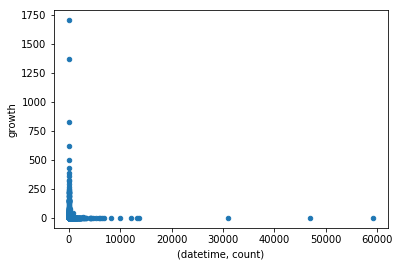

In [170]:
analysis.plot(1,4,kind="scatter") # past frequency against growth

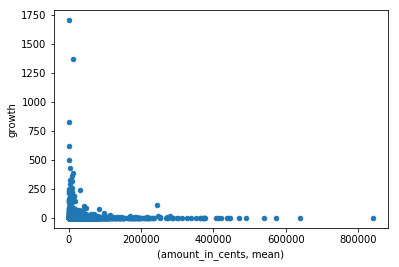

In [171]:
analysis.plot(2,4,kind="scatter") # past monetary value against growth

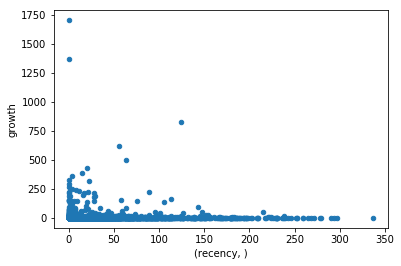

In [172]:
analysis.plot(3,4,kind="scatter") # past recency against growth

Neither past frequency nor monetary value show any correlation with high growth, but recency does

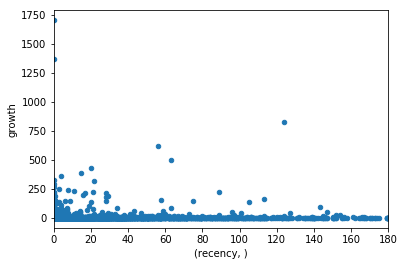

In [173]:
analysis.plot(3,4,kind="scatter",xlim=[0,180]) # past recency (with last six months) against growth

This shows that all of the high growth merchants have been active within the last 6 months

The next step is create a growth table based on the last two quarters of the past year

In [174]:
quarterly_frequency = historical_transactions.groupby(['user','quarter']).agg({'datetime':'count'}).rename(columns={'datetime':'frequency'})
# Calculate percentage increase between the last two quarters
quarterly_growth_table = quarterly_frequency.groupby('user').agg({'frequency':'pct_change'}).rename(columns={'frequency':'quarterly_growth'})
quarterly_growth_table = quarterly_growth_table.query('quarter == 3')
quarterly_growth_table.sort_values(by='quarterly_growth',ascending=False).head(10)

,,quarterly_growth
user,quarter,
5068906d0a6c0e88bac8866f9cced904571171db,3,2768.000000
247e106f37a4d581c2aa9ee05e662723c92f534e,3,1698.428571
8797a9a53889246d2ce800c4b658620cbc5aa8e2,3,1642.000000
668e99a10008dac8554799e16fd791788d9d0804,3,1202.000000
b8eb88580628c27d4df8fb830905f3ea3a411fa9,3,912.000000
427dc795aeda1aeda416a2e7c95d7268ce9e3e31,3,816.000000
ae6867a7c70bbbbe6682a85bff369a37fdf2c358,3,787.000000
267c001db2f2cda88cd446c159291ce2da0636a5,3,762.000000
65ced72bed26b54ea5f68031423fe7b1b60d1bfd,3,640.000000


Merge with the analysis table to create a kind of feature vector for predictions

In [175]:
features = pd.merge (analysis, quarterly_growth_table, on='user')
features.sort_values(by='growth',ascending=False).head(10)

,"(datetime, last)","(datetime, count)","(amount_in_cents, mean)","(recency, )",growth,quarterly_growth
user,,,,,,
98058449c2989069c339fadc11e73e06d673fce7,2016-11-05 00:05:29.746000+00:00,4,11905.750000,0,1369.250000,-0.666667
254f7196e6cfde8f5dadebaa78c4314593d1b244,2016-09-09 17:18:21.650000+00:00,1,120.000000,56,621.000000,-0.900000
0f8bf09f350a2325bea2e570b8d8ddc7df7888ca,2016-09-02 19:51:24.645000+00:00,1,1443.000000,63,498.000000,-0.500000
93ea38463d2a46c1a4c7f1bca92990a3a3456ff2,2016-10-15 21:00:13.760000+00:00,1,4089.000000,20,430.000000,-0.991453
976a7f9c2b9072ab5cba8bbc381ddbd8450ee0af,2016-10-20 03:23:10.336000+00:00,1,11425.000000,15,385.000000,0.000000
a5800b1afb725952d2c8b152d68ff2a4e39e815f,2016-10-31 16:54:44.976000+00:00,1,8899.000000,4,358.000000,0.000000
bea6e4bf84dc7462a8d50994b36bb5a8e28101c4,2016-11-05 02:32:14.522000+00:00,95,2046.947368,0,328.673684,25.000000
210440ae2fe868805dd65c96fe26bd803945534a,2016-10-13 04:49:20.288000+00:00,1,9020.000000,22,321.000000,0.000000
3d372c5286d5724b72633439dd6b8f3b20250d18,2016-11-01 17:37:57.841000+00:00,1,0.000000,3,246.000000,0.000000


In [176]:
features.describe()

,"(datetime, count)","(amount_in_cents, mean)","(recency, )",growth,quarterly_growth
count,3304.000000,3304.000000,3304.000000,3304.000000,3304.000000
mean,174.865920,22274.250204,14.543584,5.485802,9.489025
std,1540.614713,47012.543582,19.919241,35.662200,79.174322
min,1.000000,0.000000,0.000000,-0.999393,-0.996785
25%,4.000000,4007.700000,1.000000,-0.632730,-0.393480
50%,15.000000,7762.947958,6.000000,0.000000,0.262531
75%,55.000000,19990.392094,21.000000,2.284382,2.108333
max,59185.000000,638821.000000,91.000000,1369.250000,2768.000000


No obvious pattern is seen by looking at the ten merchants with highest growth rate, so I plotted the data:

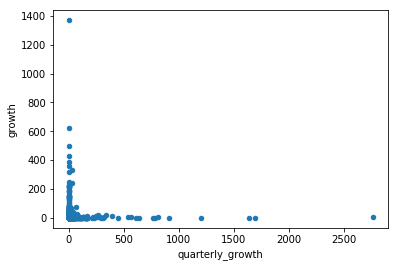

In [177]:
features.plot(5,4,kind="scatter") # past quarterly against future growth

Unfortunatly, past quarterly growth shows no correlation with future growth

I also analysed daily frequency to look for trends

In [178]:
daily_frequency = historical_transactions.groupby(['day']).agg({'datetime':'count'}).rename(columns={'datetime':'frequency'})
                                                                                     

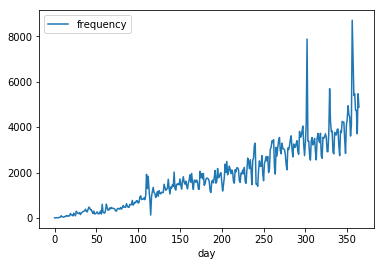

In [179]:
daily_frequency.plot.line()

In the first year of data, there is a general upward trend in transaction frequency, but ...

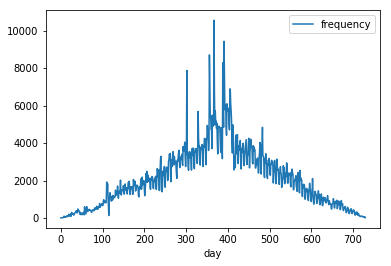

In [180]:
future_trends = transactions.groupby(['day']).agg({'datetime':'count'}).rename(columns={'datetime':'frequency'})
future_trends.plot.line()

However the two-year data shows a different trend, almost the mirror image, declining steadily. Yet we know that some merchants increased frequency from year 1 to year 2, so how to identify which ones?

Next steps:
        split the users into training and test sets (with the same proportion of high growth merchants in each)
        for the training sets normalize the frequency values so that that high daily frequency equals 1.0
        create training labels for each merchant in the training set (1.0 if in high growth group, 0.0 otherwise)
        train a binary classifier model using the normalized daily frequencies against the training labels
        train a regression model using the same data, then interpret the prediction (> 1.0 as high growth)
        validate each of the models using the test data
        create feature vectors containing the normalized daily frequency and the prediction from the regression model
        train another binary classifier using the new set of feature vectors
        

# Summary

The transaction data was segmented by recency, frequency and monetary value.
The year-on-year change in frequency was used to identify high growth merchants.
The data shows that high growth merchants were active with the last six months of the first year.
The total frequency of transactions peaked at the end of the first year and declined in the second year; this would suggest that linear regression would not be adequete to handle the data.

# Conclusions and Future Work

The data suggests one possible predictive feature; has the merchant been active within the last 6 months?
However the overall decline in transactions after the first year, would suggest that other factors are at work.
It might be interesting to convert the data into a time series, and expriement with some classification models, or possibly a classification model stacked with a regression model.

If asked to make an intuitive (without using machine learning) prediction for high growth I would look at merchants, who were active in the past 6 months and are also in the upper 75% quantile of transaction frequency (more than 55 transactions) for the past year.